In [3]:
import json
import os
import re
from pathlib import Path
import numpy as np
import cv2
import copy
import random
import xml.etree.ElementTree as ET
from PIL import Image
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook as tqdm
from pycocotools.coco import COCO

In [167]:
def plot_box(im, boxes, thres=0.5):
    # boxes[n] = [x1, y1, x2, y2, score]
    for i in range(boxes.shape[0]):
        box = boxes[i]
        if thres is None:
            cv2.rectangle(im, (box[0], box[1]), (box[2], box[3]), (20, 255, 20), 2)
        elif box[4] > thres:
            cv2.rectangle(im, (box[0], box[1]), (box[2], box[3]), (20, 255, 20), 2)
    return im 
def plot_coco_box(im, boxes, thres=0.5):
    # boxes[n] = [x1, y1, x2, y2, score]
    for i in range(boxes.shape[0]):
        box = boxes[i]
        if thres is None:
            cv2.rectangle(im, (box[0], box[1]), (box[0]+box[2], box[1]+box[3]), (20, 255, 20), 2)
        elif box[4] > thres:
            cv2.rectangle(im, (box[0], box[1]), (box[0]+box[2], box[1]+box[3]), (20, 255, 20), 2)
    return im 

In [179]:
im_dir = '/home/tony/YCB_simulation/query/images'
nd_dir = '/home/tony/YCB_simulation/output/pred_20_5'

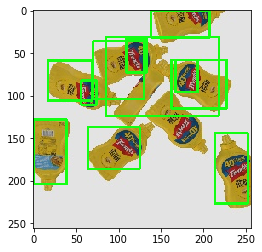

In [180]:
n = str(1077).zfill(6)
boxes = np.load(os.path.join(nd_dir, n+'.npy'), allow_pickle=True)
im = cv2.imread(os.path.join(im_dir, n+'.jpg'))
plot_box(im, boxes, thres=None)
plt.imshow(im[:, :, ::-1])

In [195]:
coco_json_path = '/home/tony/datasets/YCB2D/annotations/instances_finetune20.json'
with open(coco_json_path, 'r') as f:
    data = json.load(f)

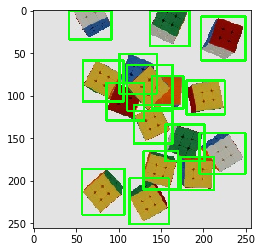

In [196]:
im_id = 1012
cls = 1
im_dir = '/home/tony/YCB_simulation/query/images'
im = cv2.imread(os.path.join(im_dir, str(im_id).zfill(6)+'.jpg'))
boxes = []
for ann in data['annotations']:
    if ann['image_id'] == im_id:
        boxes.append(ann['bbox'])
boxes = np.asarray(boxes)
plot_coco_box(im, boxes, thres=None)
plt.imshow(im[:, :, ::-1])

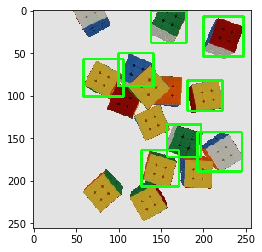

In [197]:
coco_json_path = '/home/tony/datasets/YCB2D/annotations/instances_pseudo1.json'
with open(coco_json_path, 'r') as f:
    data = json.load(f)
im_dir = '/home/tony/YCB_simulation/query/images'
im = cv2.imread(os.path.join(im_dir, str(im_id).zfill(6)+'.jpg'))
boxes = []
for ann in data['annotations']:
    if ann['image_id'] == im_id:
        boxes.append(ann['bbox'])
boxes = np.asarray(boxes)
plot_coco_box(im, boxes, thres=None)
plt.imshow(im[:, :, ::-1])

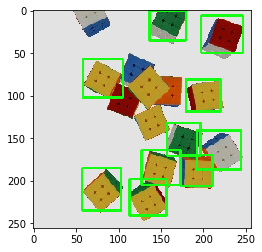

In [198]:
coco_json_path = '/home/tony/datasets/YCB2D/annotations/instances_pseudo3.json'
with open(coco_json_path, 'r') as f:
    data = json.load(f)
im_dir = '/home/tony/YCB_simulation/query/images'
im = cv2.imread(os.path.join(im_dir, str(im_id).zfill(6)+'.jpg'))
boxes = []
for ann in data['annotations']:
    if ann['image_id'] == im_id:
        boxes.append(ann['bbox'])
boxes = np.asarray(boxes)
plot_coco_box(im, boxes, thres=None)
plt.imshow(im[:, :, ::-1])

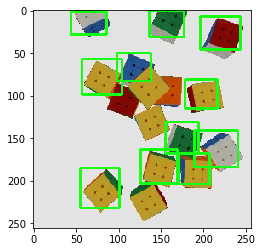

In [199]:
coco_json_path = '/home/tony/datasets/YCB2D/annotations/instances_pseudo5.json'
with open(coco_json_path, 'r') as f:
    data = json.load(f)
im_dir = '/home/tony/YCB_simulation/query/images'
im = cv2.imread(os.path.join(im_dir, str(im_id).zfill(6)+'.jpg'))
boxes = []
for ann in data['annotations']:
    if ann['image_id'] == im_id:
        boxes.append(ann['bbox'])
boxes = np.asarray(boxes)
plot_coco_box(im, boxes, thres=None)
plt.imshow(im[:, :, ::-1])

In [106]:
boxes

array([[ 99, 139,  37,  39],
       [ 74,  11,  48,  54],
       [135,  41,  45,  48],
       [ 61, 110,  50,  47],
       [ 73, 202,  40,  46],
       [103,  63,  47,  49],
       [162, 200,  51,  55],
       [139, 117,  35,  35],
       [ 25, 150,  47,  44],
       [229,  76,  26,  40],
       [166, 162,  51,  52],
       [199,  66,  45,  39],
       [160,  83,  49,  45],
       [ 63, 158,  44,  45],
       [ 11,  70,  54,  48],
       [ 53,  65,  45,  44]])

In [95]:
data['annotations']

[{'segmentation': [[184.05]],
  'area': 1.28,
  'iscrowd': 0,
  'image_id': 1000,
  'bbox': [62, 109, 39, 42],
  'category_id': 0,
  'id': 0},
 {'segmentation': [[184.05]],
  'area': 1.28,
  'iscrowd': 0,
  'image_id': 1000,
  'bbox': [26, 151, 38, 38],
  'category_id': 0,
  'id': 1},
 {'segmentation': [[184.05]],
  'area': 1.28,
  'iscrowd': 0,
  'image_id': 1000,
  'bbox': [75, 9, 40, 47],
  'category_id': 0,
  'id': 2},
 {'segmentation': [[184.05]],
  'area': 1.28,
  'iscrowd': 0,
  'image_id': 1000,
  'bbox': [71, 199, 36, 43],
  'category_id': 0,
  'id': 3},
 {'segmentation': [[184.05]],
  'area': 1.28,
  'iscrowd': 0,
  'image_id': 1000,
  'bbox': [162, 81, 39, 41],
  'category_id': 0,
  'id': 4},
 {'segmentation': [[184.05]],
  'area': 1.28,
  'iscrowd': 0,
  'image_id': 1000,
  'bbox': [136, 39, 37, 44],
  'category_id': 0,
  'id': 5},
 {'segmentation': [[184.05]],
  'area': 1.28,
  'iscrowd': 0,
  'image_id': 1000,
  'bbox': [167, 162, 42, 45],
  'category_id': 0,
  'id': 6},


## ground truth

In [135]:
cls_names = ['cube', 'can', 'box', 'bottle']
clsname2ind = {'cube':0, 'can':1, 'box':2, 'bottle':3}
cls_im_inds = [list(range(1000, 1020)), list(range(1020, 1040)), list(range(1040, 1060)), list(range(1060, 1080))]

In [136]:
data_root = '/home/tony/YCB_simulation/query'
ann_dir = os.path.join(data_root, 'ndarray')

data_categories = []
for cls_name in cls_names:   
    dic = {}
    dic['supercategory'] = 'None'
    dic['id'] = clsname2ind[cls_name]
    dic['name'] = cls_name
    data_categories.append(dic)
ann_cnt = 0
data_images = []
data_annotations = []
for cls, inds in zip(cls_names, cls_im_inds):
    for ind in inds:
        im_file_name = str(ind).zfill(6) + '.jpg'
        dic = {}
        dic['license'] = 1
        dic['file_name'] = im_file_name
        dic['coco_url'] = 'http://farm3.staticflickr.com/2253/1755223462_fabbeb8dc3_z.jpg'
        dic['height'] = 256
        dic['width'] = 256
        dic['date_captured'] = '2013-11-15 13:55:22'
        dic['id'] = ind
        data_images.append(dic)
        
        ann_file_name = str(ind).zfill(6) + '.npy'
        boxes = np.load(os.path.join(ann_dir, ann_file_name), allow_pickle=True)
        for j in range(boxes.shape[0]):
            box = boxes[j]
            dic = {}
            dic['segmentation'] = [[184.05]]
            dic['area'] = 1.28
            dic['iscrowd'] = 0
            dic['image_id'] = ind
            dic['bbox'] = [int(box[0]), int(box[1]), int(box[2]) - int(box[0]), int(box[3]) - int(box[1])]
            dic['category_id'] = clsname2ind[cls]
            dic['id'] = ann_cnt
            ann_cnt += 1
            data_annotations.append(dic)
            

In [137]:
coco_json_path = '/home/tony/datasets/coco/annotations/instances_minival2014.json'
with open(coco_json_path, 'r') as f:
    data = json.load(f)
new_dict = {}
new_dict['info'] = data['info']
new_dict['images'] = data_images
new_dict['licenses'] = data['licenses']
new_dict['annotations'] = data_annotations
new_dict['categories'] = data_categories
dump_path = '/home/tony/datasets/YCB2D/annotations/instances_finetune20.json'
with open(dump_path, 'w') as f:
    json.dump(new_dict, f)

In [138]:
_COCO = COCO(dump_path)

print(len(_COCO.imgs))
print(len(_COCO.anns))
print(len(_COCO.cats))

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
80
1020
4


## pseudo label

In [90]:
ann_dir = '/home/tony/YCB_simulation/output/cisa_iter3'

In [91]:
cls_names = ['cube', 'can', 'box', 'bottle']
clsname2ind = {'cube':0, 'can':1, 'box':2, 'bottle':3}
cls_im_inds = [list(range(1000, 1010)), list(range(1010, 1020)), list(range(1020, 1030)), list(range(1030, 1040))]

In [92]:
data_categories = []
for cls_name in cls_names:   
    dic = {}
    dic['supercategory'] = 'None'
    dic['id'] = clsname2ind[cls_name]
    dic['name'] = cls_name
    data_categories.append(dic)
ann_cnt = 0
data_images = []
data_annotations = []
for cls, inds in zip(cls_names, cls_im_inds):
    for ind in inds:
        im_file_name = str(ind).zfill(6) + '.jpg'
        dic = {}
        dic['license'] = 1
        dic['file_name'] = im_file_name
        dic['coco_url'] = 'http://farm3.staticflickr.com/2253/1755223462_fabbeb8dc3_z.jpg'
        dic['height'] = 256
        dic['width'] = 256
        dic['date_captured'] = '2013-11-15 13:55:22'
        dic['id'] = ind
        data_images.append(dic)
        
        ann_file_name = str(ind).zfill(6) + '.npy'
        boxes = np.load(os.path.join(ann_dir, ann_file_name), allow_pickle=True)
        for j in range(boxes.shape[0]):
            box = boxes[j]
            dic = {}
            dic['segmentation'] = [[184.05]]
            dic['area'] = 1.28
            dic['iscrowd'] = 0
            dic['image_id'] = ind
            dic['bbox'] = [int(box[0]), int(box[1]), int(box[2]) - int(box[0]), int(box[3]) - int(box[1])]
            dic['category_id'] = clsname2ind[cls]
            dic['id'] = ann_cnt
            ann_cnt += 1
            data_annotations.append(dic)
coco_json_path = '/home/tony/datasets/coco/annotations/instances_minival2014.json'
with open(coco_json_path, 'r') as f:
    data = json.load(f)
new_dict = {}
new_dict['info'] = data['info']
new_dict['images'] = data_images
new_dict['licenses'] = data['licenses']
new_dict['annotations'] = data_annotations
new_dict['categories'] = data_categories
dump_path = '/home/tony/datasets/YCB2D/annotations/instances_iter11.json'
with open(dump_path, 'w') as f:
    json.dump(new_dict, f)

In [93]:
_COCO = COCO(dump_path)

print(len(_COCO.imgs))
print(len(_COCO.anns))
print(len(_COCO.cats))

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
40
326
4
